# Linear Regression 

## import library

In [339]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [340]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

In [341]:
print(num_data)
data.shape

2500


(2500, 3)

In [342]:
xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

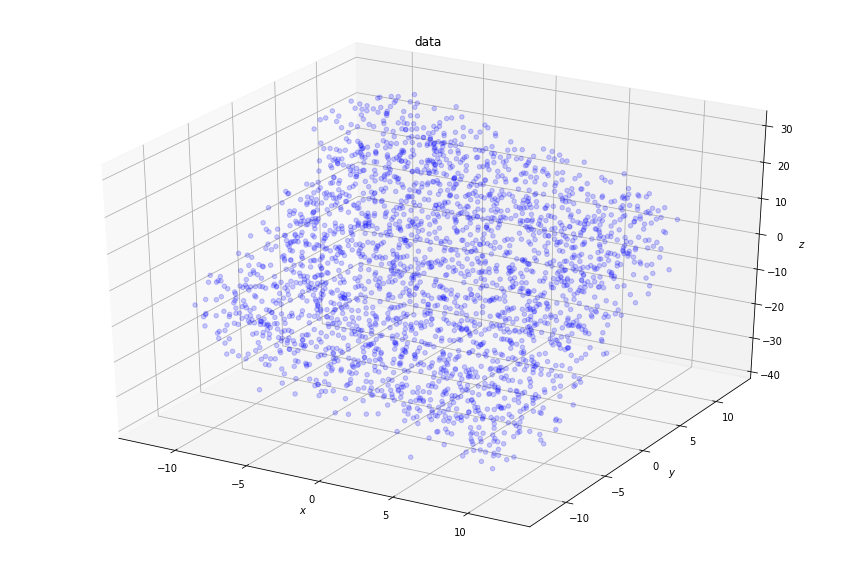

In [343]:
# x, y, z의 좌표를 coordinate한 것.

fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [344]:
def model_function(theta, x, y):
    theta_vector = theta.reshape(1, 3).T
    x_vector = x.reshape(1, num_data).T
    y_vector = y.reshape(1, num_data).T
    one_vector = np.ones(shape = (num_data, 1), dtype = int)
    
    data_matrix = np.hstack((one_vector, x_vector, y_vector))
    
    f_hat = np.dot(data_matrix, theta_vector)
    
    return f_hat

In [345]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    z_vector = z.reshape(1, 2500).T
    f_hat = model_function(theta, x, y)
    residual = f_hat - z_vector
    num_data = residual.shape[0]
    # ============================
    return residual, num_data

In [346]:
residual, num_data = compute_residual(a, xx, yy, zz)
print(residual.shape)
print(num_data)

(2500, 1)
2500


In [347]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data = compute_residual(theta, x, y, z)
    loss = np.dot(residual.T, residual) / (2 * num_data)
    # ============================
    return loss[0]

In [327]:
test_loss = compute_loss(a, xx, yy, zz)
test_loss

array([95.36768272])

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [348]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data = compute_residual(theta, x, y, z)
    
    x_vector = x.reshape(1, num_data).T
    y_vector = y.reshape(1, num_data).T
    one_vector = np.ones(shape = (num_data, 1), dtype = int)
    
    data_matrix = np.hstack((one_vector, x_vector, y_vector))    
    
    grad_vector = np.dot(data_matrix.T, residual) / num_data
    grad = grad_vector.flatten(order = 'F')
    # ============================
    return grad            

## gradient descent for each model parameter

In [349]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====    
    grad = compute_gradient(theta, xx, yy, zz)
    theta = theta - (learning_rate * grad)
    loss = compute_loss(theta, xx, yy, zz)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss

    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))
#     print("theta = ", theta)
#     print("grad = ", grad)

iteration =    0, loss = 46.08423
iteration =    1, loss = 25.70661
iteration =    2, loss = 17.25197
iteration =    3, loss = 13.71586
iteration =    4, loss = 12.20934
iteration =    5, loss = 11.54086
iteration =    6, loss = 11.21896
iteration =    7, loss = 11.04093
iteration =    8, loss = 10.92313
iteration =    9, loss = 10.83106
iteration =   10, loss = 10.75047
iteration =   11, loss = 10.67546
iteration =   12, loss = 10.60359
iteration =   13, loss = 10.53382
iteration =   14, loss = 10.46572
iteration =   15, loss = 10.39908
iteration =   16, loss = 10.33383
iteration =   17, loss = 10.26989
iteration =   18, loss = 10.20723
iteration =   19, loss = 10.14582
iteration =   20, loss = 10.08563
iteration =   21, loss = 10.02664
iteration =   22, loss = 9.96883
iteration =   23, loss = 9.91217
iteration =   24, loss = 9.85663
iteration =   25, loss = 9.80220
iteration =   26, loss = 9.74885
iteration =   27, loss = 9.69657
iteration =   28, loss = 9.64532
iteration =   29, los

In [350]:
optimal_theta = theta_iteration[999]
f = optimal_theta[0] + optimal_theta[1] * xx + optimal_theta[2] * yy

## plot the results

In [351]:
# plot the loss values  (𝜃)  in red curve over the gradient descent iterations
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====

    plt.plot(loss_iteration, color = 'red')
    
    # ============================
    plt.tight_layout()
    plt.show()

In [352]:
# plot the input data in blue point in 3-dimensional space
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

    # ============================    
    plt.tight_layout()
    plt.show()

In [353]:
# plot the values of the model parameters  𝜃0  in red curve,  𝜃1  in green curve, and  𝜃2  in blue curve over the gradient descent iterations
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    plt.plot(theta_iteration[:, 0], color = 'red')
    plt.plot(theta_iteration[:, 1], color = 'green')
    plt.plot(theta_iteration[:, 2], color = 'blue')

    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
plot_loss_curve(loss_iteration)

In [ ]:
plot_model_parameter(theta_iteration)

In [354]:
    # ===== FILL UP THE CODE =====
# plot the optimal regression surface  𝑓̂ (𝜃∗)  in 3-dimensional space with a given set of data points superimposed

    # ============================ 
XX  = np.arange(-10, 10, 0.1)
YY  = np.arange(-10, 10, 0.1)

XX, YY = np.meshgrid(XX, YY)
ZZ = optimal_theta[0] + optimal_theta[1] * XX + optimal_theta[2] * YY

In [355]:
def plot_surface(XX, YY, ZZ, xx, yy, zz):

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    ax.plot_surface(XX, YY, ZZ)

    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

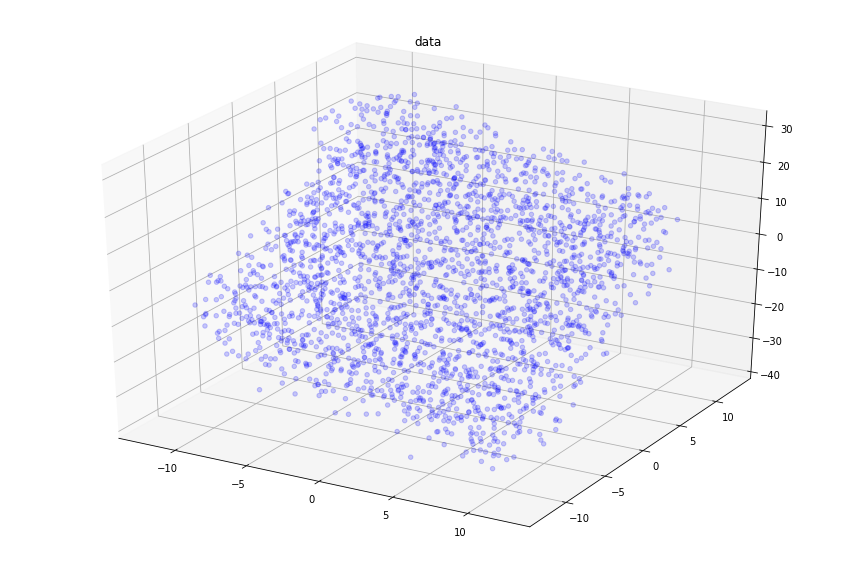

In [356]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

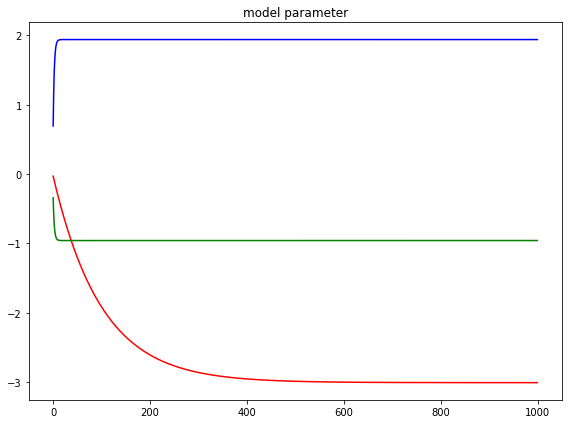

In [357]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

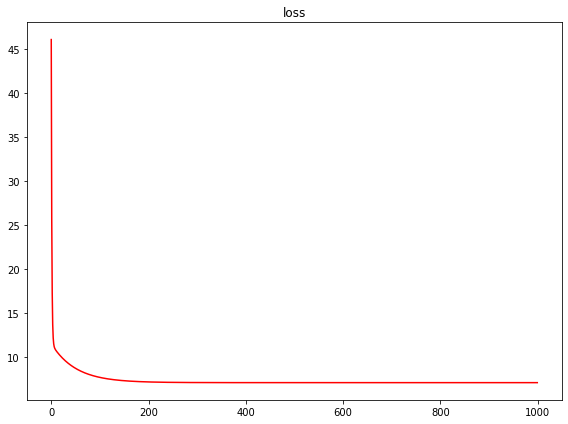

In [358]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

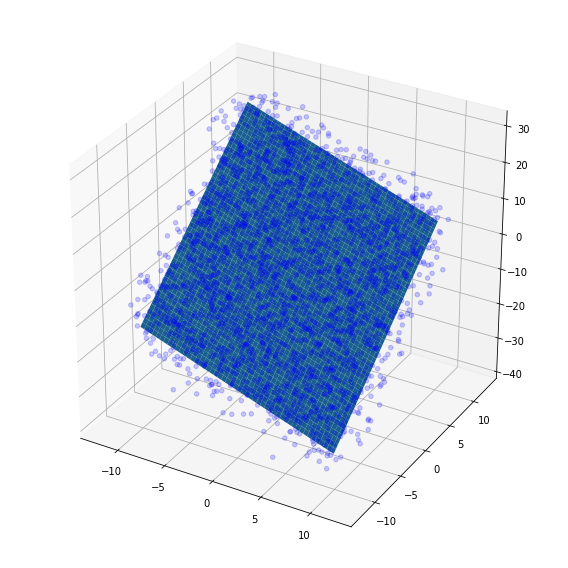

In [359]:
plot_surface(XX, YY, ZZ, xx, yy, zz)